In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\Computer Science\Machine Learning\Projects\Red wine Prediction\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


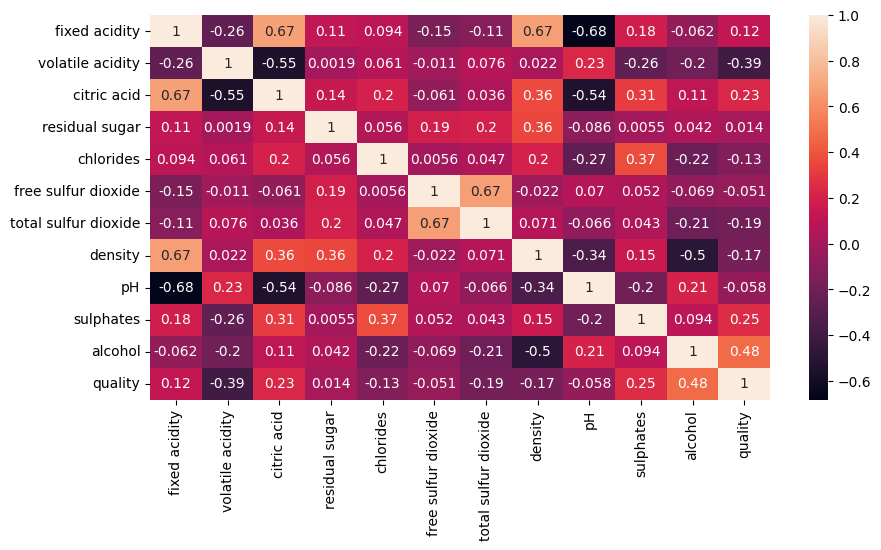

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True);

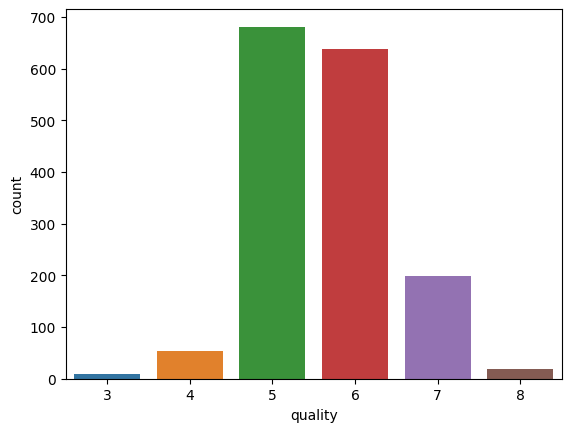

In [7]:
sns.countplot(x = df['quality']);

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

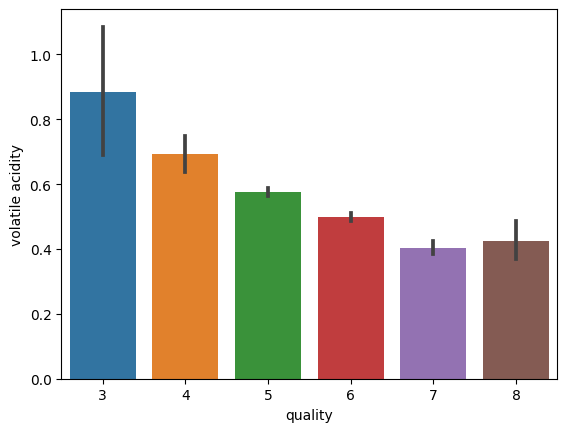

In [8]:
sns.barplot(x = df['quality'],y = df['volatile acidity'])

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

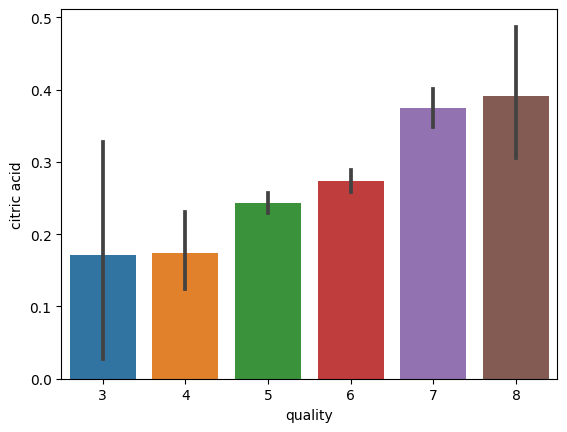

In [9]:
sns.barplot(x = df['quality'],y = df['citric acid'])

In [10]:
x = df.iloc[:,0:11]
y = df.iloc[:,-1]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

In [12]:
scaler = StandardScaler()
scaler.fit(x)
x_transformed = scaler.transform(x)

In [13]:
x = x_transformed

In [14]:
# Label Binarization
y = df['quality'].apply(lambda y_value:1 if y_value >= 7 else 0)

In [15]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [16]:
model = RandomForestClassifier()
score = cross_val_score(model,x,y,scoring = "neg_mean_squared_error",cv = 10)
print(-1*score)

[0.125      0.1125     0.175      0.11875    0.1125     0.10625
 0.15625    0.13125    0.13125    0.11320755]


In [17]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.940625

In [35]:
model1 = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,25, 50, 100, 150,200], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [1,3, 6, 9,12,15,30,40], 
    'max_leaf_nodes': [1,3, 6, 9,12,15,30,40], 
}

In [36]:
search = RandomizedSearchCV(model1,param_distributions=param_grid,random_state=42,n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(x,y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
63 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=1,
                   param_distributions={'max_depth': [1, 3, 6, 9, 12, 15, 30,
                                                      40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [1, 3, 6, 9, 12, 15,
                                                           30, 40],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         200]},
                   random_state=42, return_train_score=True, verbose=1)

In [37]:
search.best_params_

{'n_estimators': 25,
 'max_leaf_nodes': 30,
 'max_features': 'log2',
 'max_depth': 12}

In [40]:
model1 = RandomForestClassifier(n_estimators=25,max_leaf_nodes=30,max_features='log2',max_depth=12)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_features='log2', max_leaf_nodes=30,
                       n_estimators=25)

In [41]:
y_pred = model1.predict(x_test)
accuracy_score(y_pred,y_test)

0.925